In [1]:
import pandas as pd

In [2]:
import os 

In [4]:
a=pd.read_pickle('./TumorSUse/SalgiaGroupID_001/TumorS_1_LocInform.plk')

In [5]:
a.loc[:,'Path']='temp'
a.loc[:,'TumorSUse']='temp'

In [10]:
a

,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse
0,0,352.0,background,NaN,temp,temp
1,16,466.0,middle_occipital_gyrus,left,temp,temp


In [5]:
'TumorS_1_LocInform.plk'.split('_')[:2]

['TumorS', '1']

In [6]:
DfUse=a
for root,dirs,files in os.walk('./TumorSUse/'):
    if files!=[]:
        for f in files:
            Path=os.path.join(root,f)
            temp=pd.read_pickle(Path)
            temp.loc[:,'Path']=Path
            temp.loc[:,'TumorSUse']='_'.join(f.split('_')[:2])
            DfUse=pd.concat([DfUse,temp],ignore_index=True)
            

In [7]:
TumorLocation=DfUse[DfUse.Path!='temp'].reset_index()

In [19]:
TumorLocation.drop('index',axis=1,inplace=True)

In [20]:
TumorLocation.to_pickle('./TumorLocation.plk')

In [21]:
TumorLocation.head()

,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse
0,69,295.0,middle_frontal_gyrus,right,./TumorSUse/SalgiaGroupID_148/TumorS_1_LocInfo...,TumorS_1
1,71,59.0,precentral_gyrus,right,./TumorSUse/SalgiaGroupID_141/TumorS_3_LocInfo...,TumorS_3
2,0,5.0,background,NaN,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4
3,66,142.0,superior_parietal_lobule,right,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4
4,72,92.0,postcentral_gyrus,right,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4


In [11]:
TumorLocation.loc[:,'ChenLabID']=[TumorLocation.Path[i].split('/')[2] for i in TumorLocation.index]

In [27]:
TumorLocation.head()

,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse,ChenLabID
0,69,295.0,middle_frontal_gyrus,right,./TumorSUse/SalgiaGroupID_148/TumorS_1_LocInfo...,TumorS_1,SalgiaGroupID_148
1,71,59.0,precentral_gyrus,right,./TumorSUse/SalgiaGroupID_141/TumorS_3_LocInfo...,TumorS_3,SalgiaGroupID_141
2,0,5.0,background,NaN,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4,SalgiaGroupID_141
3,66,142.0,superior_parietal_lobule,right,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4,SalgiaGroupID_141
4,72,92.0,postcentral_gyrus,right,./TumorSUse/SalgiaGroupID_141/TumorS_4_LocInfo...,TumorS_4,SalgiaGroupID_141


In [8]:
RadiomicFeature=pd.read_pickle('./RadiomicFeatureDfUse_20180709.plk')

In [9]:
Marker=RadiomicFeature.iloc[:,[0,3,4,5]].drop_duplicates(['ChenLabID'])

In [12]:
TumorLocUse=pd.merge(Marker,TumorLocation,on='ChenLabID')

In [20]:
TumorLocUse.head()

,ChenLabID,ALK,EGFR,KRAS,index,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse
0,SalgiaGroupID_001,0,1,0,3161,1,6793.0,superior_parietal_lobule,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
1,SalgiaGroupID_001,0,1,0,3162,8,3031.0,angular_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
2,SalgiaGroupID_001,0,1,0,3163,14,17.0,superior_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
3,SalgiaGroupID_001,0,1,0,3164,16,399.0,middle_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
4,SalgiaGroupID_001,0,1,0,3165,4,33.0,middle_frontal_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_7_LocInfo...,TumorS_7


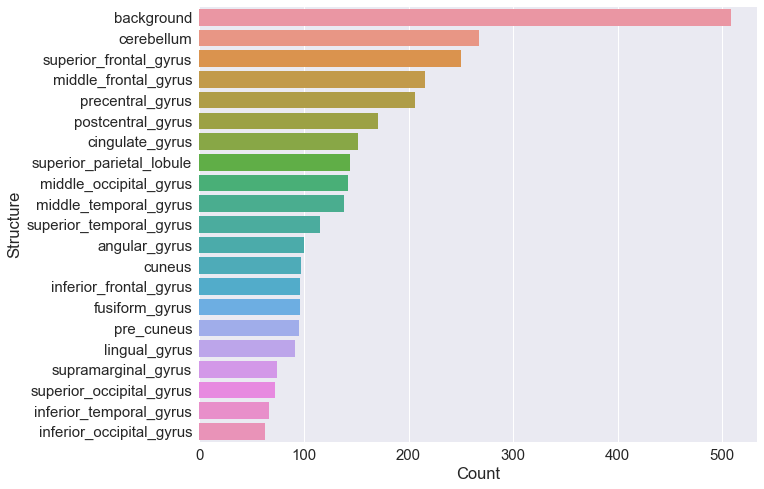

In [82]:
Test_All=TumorLocUse.loc[:,['Structure','Count']].groupby(['Structure']).sum()
Test_All=Test_All.reset_index()
Test_All50=Test_All[Test_All.Structure.isin(Test_All.Structure[Test_All.Count>50])].sort_values("Count", ascending=False)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
g=sns.barplot(y="Structure", x="Count", data=Test_All50)


plt.show()

In [55]:
TumorLocUse.head()

,ChenLabID,ALK,EGFR,KRAS,index,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse
0,SalgiaGroupID_001,0,1,0,3161,1,6793.0,superior_parietal_lobule,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
1,SalgiaGroupID_001,0,1,0,3162,8,3031.0,angular_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
2,SalgiaGroupID_001,0,1,0,3163,14,17.0,superior_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
3,SalgiaGroupID_001,0,1,0,3164,16,399.0,middle_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
4,SalgiaGroupID_001,0,1,0,3165,4,33.0,middle_frontal_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_7_LocInfo...,TumorS_7


In [32]:
TumorLocUseFinial=TumorLocUse.loc[:,['Structure','VoxCounts','ChenLabID','EGFR','ALK','KRAS']].groupby(['ChenLabID','EGFR','ALK','KRAS']).max()

In [34]:
TumorLocUseFinial.reset_index(inplace=True)

In [35]:
TumorLocUseFinial.head()

,ChenLabID,EGFR,ALK,KRAS,Structure,VoxCounts
0,SalgiaGroupID_001,1,0,0,superior_parietal_lobule,6793.0
1,SalgiaGroupID_003,1,0,0,tapatum,18560.0
2,SalgiaGroupID_004,1,0,0,superior_longitudinal_fasciculus,106.0
3,SalgiaGroupID_005,1,0,0,thalamus,404.0
4,SalgiaGroupID_007,1,0,0,superior_fronto_occipital_fasciculus,1823.0


In [39]:
TumorLocUseFinial1=pd.DataFrame(TumorLocUseFinial.set_index(['Structure','VoxCounts','ChenLabID']).stack()).reset_index()

In [40]:
TumorLocUseFinial1.head()

,Structure,VoxCounts,ChenLabID,level_3,0
0,superior_parietal_lobule,6793.0,SalgiaGroupID_001,EGFR,1
1,superior_parietal_lobule,6793.0,SalgiaGroupID_001,ALK,0
2,superior_parietal_lobule,6793.0,SalgiaGroupID_001,KRAS,0
3,tapatum,18560.0,SalgiaGroupID_003,EGFR,1
4,tapatum,18560.0,SalgiaGroupID_003,ALK,0


In [44]:
TumorLocUseFinial2=TumorLocUseFinial1[TumorLocUseFinial1.loc[:,0]!=0].drop(0,axis=1).rename(columns={'level_3':'Gene'})

In [45]:
TumorLocUseFinial2.head()

,Structure,VoxCounts,ChenLabID,Gene
0,superior_parietal_lobule,6793.0,SalgiaGroupID_001,EGFR
3,tapatum,18560.0,SalgiaGroupID_003,EGFR
6,superior_longitudinal_fasciculus,106.0,SalgiaGroupID_004,EGFR
9,thalamus,404.0,SalgiaGroupID_005,EGFR
12,superior_fronto_occipital_fasciculus,1823.0,SalgiaGroupID_007,EGFR


In [16]:
from collections import Counter

In [48]:

TumorLocUseFinial3=TumorLocUseFinial2.loc[:,['Gene','Structure']].groupby('Gene').agg(lambda x:dict(Counter(x).items()))

In [49]:
TumorLocUseFinial3.to_excel('./Loc.xlsx')

In [50]:
TumorLocUseFinial3

,Structure
Gene,
ALK,"{'supramarginal_gyrus': 5, 'uncinate_fasciculu..."
EGFR,"{'superior_parietal_lobule': 14, 'tapatum': 5,..."
KRAS,"{'tapatum': 3, 'precentral_gyrus': 1, 'suprama..."


In [54]:
pd.DataFrame({'ALK':TumorLocUseFinial3.Structure[0],'EGFR':TumorLocUseFinial3.Structure[1],'KRAS':TumorLocUseFinial3.Structure[2]})

,ALK,EGFR,KRAS
cerebellum,1.0,3.0,NaN
cuneus,NaN,1.0,NaN
fusiform_gyrus,1.0,NaN,2.0
lateral_fronto_orbital_gyrus,NaN,1.0,NaN
middle_cerebellar_peduncle,1.0,NaN,NaN
middle_frontal_gyrus,1.0,2.0,NaN
middle_fronto_orbital_gyrus,1.0,NaN,NaN
middle_occipital_gyrus,2.0,NaN,NaN
middle_temporal_gyrus,1.0,NaN,1.0
pre_cuneus,1.0,NaN,NaN


In [ ]:
TumorLocUseFinial2

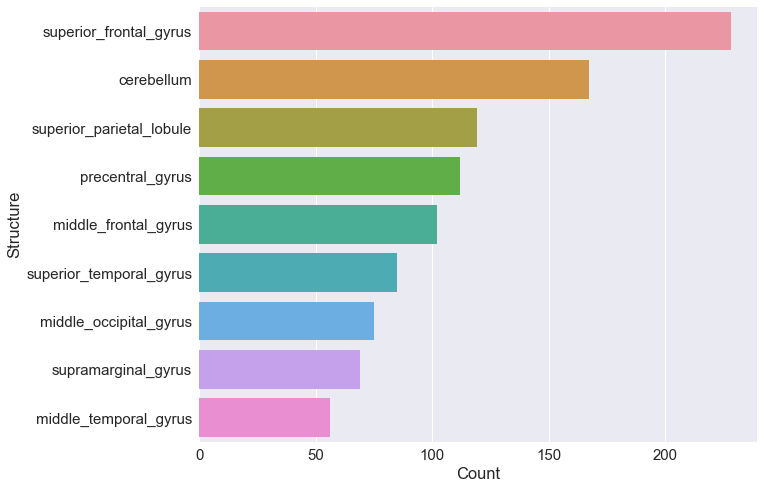

In [90]:
TumorBiggest.loc[:,'Count']=1
Test_All=TumorBiggest.loc[:,['Structure','Count']].groupby(['Structure']).sum()
Test_All=Test_All.reset_index()
Test_All50=Test_All[Test_All.Structure.isin(Test_All.Structure[Test_All.Count>50])].sort_values("Count", ascending=False)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
g=sns.barplot(y="Structure", x="Count", data=Test_All50)
plt.show()

In [36]:
TumorLocUse.loc[:,'Count']=1

In [42]:
Test_EGFR=TumorLocUse.loc[:,['EGFR','Structure','Count']].groupby(['EGFR','Structure']).sum()

In [47]:
Test_EGFR=Test_EGFR.reset_index()

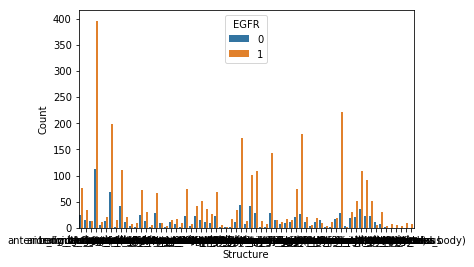

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Structure", y="Count", hue="EGFR", data=Test_EGFR)
plt.show()

In [50]:
Test_EGFR.head()

,EGFR,Structure,Count
0,0,angular_gyrus,24
1,0,anterior_corona_radiata,16
2,0,anterior_limb_of_internal_capsule,14
3,0,background,112
4,0,body_of_corpus_callosum,5


In [74]:
Test_EGFR50=Test_EGFR[Test_EGFR.Structure.isin(Test_EGFR.Structure[Test_EGFR.Count>50])].sort_values("Count", ascending=False)

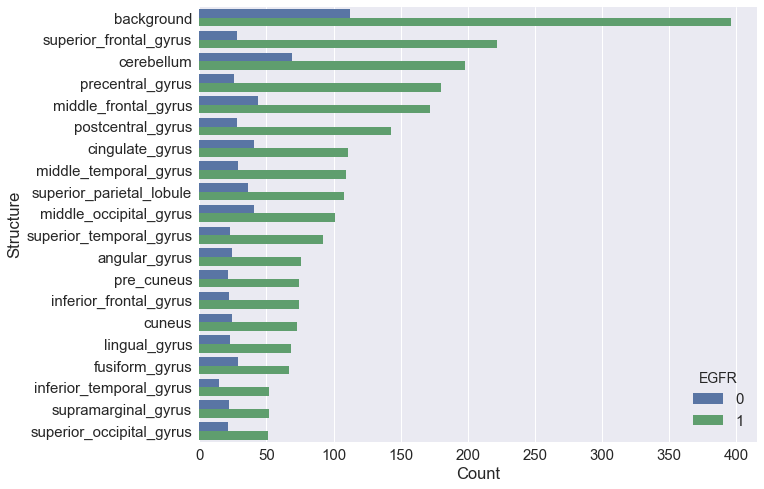

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
g=sns.barplot(y="Structure", x="Count", hue="EGFR", data=Test_EGFR50)


plt.show()

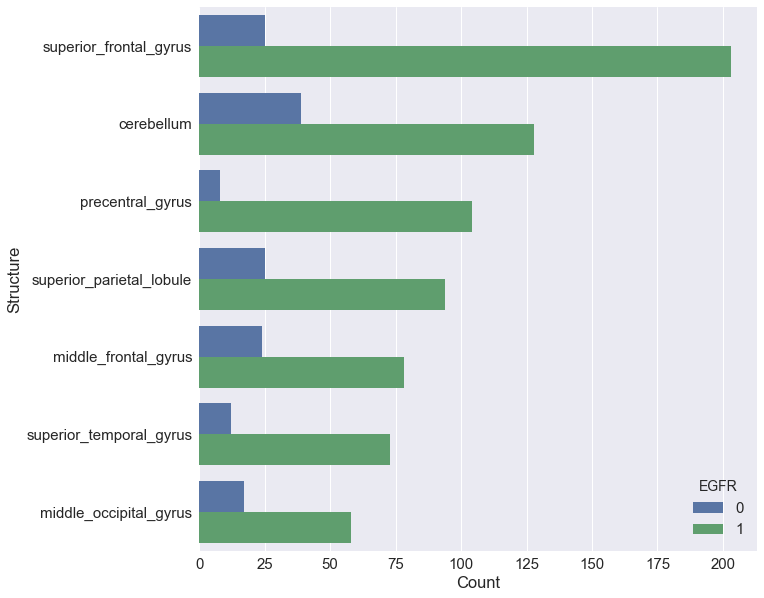

In [104]:
Test_EGFR=TumorBiggest.loc[:,['EGFR','Structure','Count']].groupby(['EGFR','Structure']).sum()
Test_EGFR=Test_EGFR.reset_index()
Test_EGFR50=Test_EGFR[Test_EGFR.Structure.isin(Test_EGFR.Structure[Test_EGFR.Count>50])].sort_values("Count", ascending=False)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
g=sns.barplot(y="Structure", x="Count", hue="EGFR", data=Test_EGFR50)



plt.show()

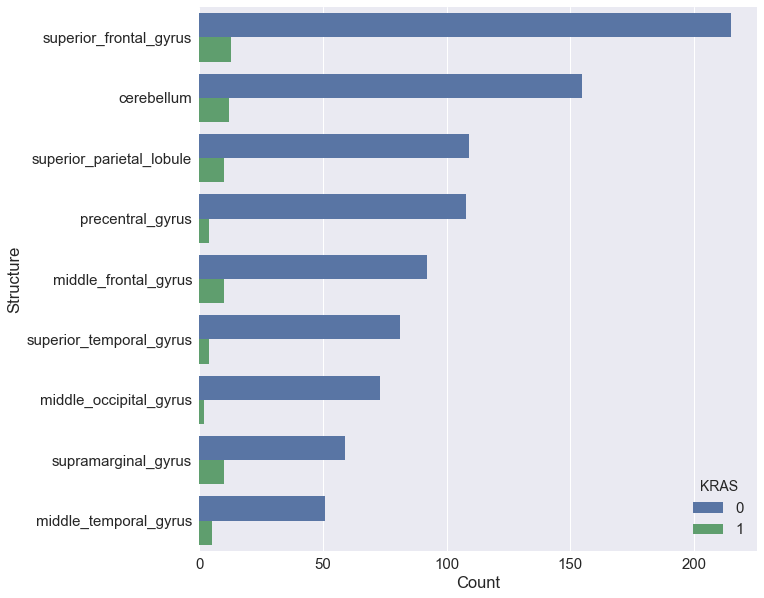

In [103]:
Test_EGFR=TumorBiggest.loc[:,['EGFR','Structure','Count']].groupby(['EGFR','Structure']).sum()
Test_EGFR=Test_EGFR.reset_index()
Test_EGFR50=Test_EGFR[Test_EGFR.Structure.isin(Test_EGFR.Structure[Test_EGFR.Count>50])].sort_values("Count", ascending=False)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
g=sns.barplot(y="Structure", x="Count", hue="EGFR", data=Test_EGFR50)



plt.show()

,ChenLabID,ALK,EGFR,KRAS,index,LobeLabel,VoxCounts,Structure,RightLeft,Path,TumorSUse
0,SalgiaGroupID_001,0,1,0,3161,1,6793.0,superior_parietal_lobule,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
1,SalgiaGroupID_001,0,1,0,3162,8,3031.0,angular_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
2,SalgiaGroupID_001,0,1,0,3163,14,17.0,superior_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
3,SalgiaGroupID_001,0,1,0,3164,16,399.0,middle_occipital_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_3_LocInfo...,TumorS_3
4,SalgiaGroupID_001,0,1,0,3165,4,33.0,middle_frontal_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_7_LocInfo...,TumorS_7
5,SalgiaGroupID_001,0,1,0,3166,6,144.0,precentral_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_7_LocInfo...,TumorS_7
6,SalgiaGroupID_001,0,1,0,3167,2,538.0,cingulate_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_4_LocInfo...,TumorS_4
7,SalgiaGroupID_001,0,1,0,3168,3,2571.0,superior_frontal_gyrus,left,./TumorSUse/SalgiaGroupID_001/TumorS_4_LocInfo...,TumorS_4
8,SalgiaGroupID_001,0,1,0,3169,37,60.0,anterior_corona_radiata,left,./TumorSUse/SalgiaGroupID_001/TumorS_4_LocInfo...,TumorS_4
9,SalgiaGroupID_001,0,1,0,3170,67,58.0,cingulate_gyrus,right,./TumorSUse/SalgiaGroupID_001/TumorS_4_LocInfo...,TumorS_4


In [58]:
TumorLocUse.rename(columns={'TumorSUse':'TumorS_Use'},inplace=True)

In [59]:
TumorLocUse.to_pickle('./TumorLocationUse.plk')

In [ ]:

from sklearn.decomposition import PCA
pca=PCA()
pca.fit(PatientRadiomicT1cTimeSpan1ZScore)
cumsum=np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.show()
print np.argmax(cumsum>0.95)+1